## 전체 영양제 리뷰 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_all=pd.read_csv('../datasets/reviews_data/all_product.csv')
df_all[-2:]

,product_name,review_date,review_content,review_star,review_writer
90624,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,5.0,채슨생
90625,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.03.27,배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요,5.0,smcd***


### 불용어 처리 및 한글자 살리기 및 단어 치환, 

#### 전처리 필요한 파일들 가져오기

In [4]:
# 불용어 
df_stop = pd.read_excel('../datasets/dic/stopword_list.xlsx')
df_stop[-2:]

,stopword
1177,\r\n
1178,\n


In [5]:
# 한글자 살리기
df_oneword=pd.read_excel('../datasets/dic/one_char_list.xlsx')
df_oneword[-2:]

,one_char_keyword
12,굿
13,굳


#### 전처리 시작 
- 1. 형태소 분석 및 토큰화
- 2. 단어 치환
- 3. 불용어 처리


In [ ]:
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# df_all['reveiw_replaced'] 열의 각 텍스트에 대해 중복 단어 제거 및 형태소 분석 수행
tokenized_reviews = []

# 필요한 품사 리스트 정의
desired_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']

# 형태소 분석 결과를 담을 리스트 초기화
tokenized_reviews = []

for review_text in df_all['review_content']:
    try:
        # 형태소 분석 수행
        pos_result = okt.pos(review_text, norm=True, stem=True)
        
        # 필요한 조건을 만족하는 단어 선택
        filtered_tokens = []
        for word, pos in pos_result:
            if pos in desired_pos and len(word) > 1:
                filtered_tokens.append(word)
                    
        tokenized_reviews.append(filtered_tokens)  # 각 토큰을 개별 항목으로 유지
    except:
        pass

In [ ]:
# 데이터프레임 df_all의 행 수 확인
df_all_shape = df_all.shape[0]

# tokenized_reviews 리스트의 길이 확인
tokenized_reviews_length = len(tokenized_reviews)

# 데이터프레임 df_all과 tokenized_reviews의 크기 비교
if df_all_shape == tokenized_reviews_length:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.")
else:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치하지 않습니다.")
    print(f"df_all의 행 수: {df_all_shape}")
    print(f"tokenized_reviews의 길이: {tokenized_reviews_length}")

In [ ]:
df_all['tokenized_reviews']=tokenized_reviews

In [ ]:
# # 단어 치환 함수
# def replace_word(review):
#     for number in range(len(df_replace['before_replacement'])):
#         try: 
#             # 치환 단어만 데이터 치환
#             if replace_list['before_replacement'][number] in review:
#                 review = review.replace(replace_list['before_replacement'][number], replace_list['after_replacement'][number])
#         except: 
#             pass
#     return review

In [ ]:
# # 치환된 리뷰 생성
# df_all['review_replaced'] = df_all['tokenized_reviews'].apply(replace_word)

In [ ]:
# # 치환된 단어만 출력
# for replaced_review_list in df_all['review_replaced']:
#     for replaced_review in replaced_review_list:
#         replaced_tokens = replaced_review.split()
        
#         # 치환된 단어를 한 줄에 출력
#         for replaced in replaced_tokens:
#             print(f"치환된 단어: {replaced}")

In [ ]:
# df_all['review_replaced']

In [ ]:
# 불용어 목록을 리스트로 변환
stop_list = df_stop['stopword'].tolist()

# 불용어 처리 함수 정의
def stopword(tokens):
    removed_tokens = [word for word in tokens if word not in stop_list]
    return ' '.join(removed_tokens)

In [ ]:
# df_all['origin_reviews'] 열의 각 리스트에 불용어 처리 적용하고 쪼개기
df_all['replaced_review'] = df_all['tokenized_reviews'].apply(stopword)

In [ ]:
df_all['replaced_review'][2299]

In [ ]:
type(df_all['replaced_review'][2299])

In [ ]:
# pd.read_csv('../datasets/reviews_data/all_preprocess.csv')

In [ ]:
df_all['replaced_review'][2299]

In [ ]:
# # 리스트 형태의 문서를 텍스트로 변환
# corpus_text = [' '.join(doc) for doc in df_all['replaced_review']]

In [ ]:
# df_all['replaced_review'] = corpus_text

In [ ]:
df_all

In [ ]:
df_all.to_csv('../datasets/reviews_data/all_preprocess.csv')

In [ ]:
df_all.isnull().sum()

In [4]:
# df_all=pd.read_csv('../datasets/reviews_data/all_preprocess.csv')

In [5]:
df_all

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,tokenized_reviews,replaced_review
0,0,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.03.19,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...,5.0,지오됴됴,"['배송', '빨르다', '성능', '보통', '유통', '기한', '기한', '넉...",빨르다 감마 리놀렌산 여성 좋다 다해 초록색 엄청 비교 해보다 브리 결정 함량 높다...
1,1,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.07.05,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...,5.0,ju82**,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",상태 깔끔하다 좋다 두번째 구입 월경 증후군 구입 모르다 영향 다시 주문 알약 크기...
2,2,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.20,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...,5.0,sns2**,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",상태 깔끔하다 좋다 유트브 구매 피부 염증 좋다 판매 답글 판매 안녕하다 고객 브리...
3,3,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.19,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\r\n약이 좀 커...,4.0,gus1***,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",상태 깔끔하다 크다 아직 모르다 판매 답글 판매 안녕하다 고객 브리 제품 구매 해주...
4,4,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.11.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n우선 약통 케이스도...,5.0,gksd******,"['배송', '빨르다', '성능', '성능', '뛰어나다', '유통', '기한', ...",빨르다 뛰어나다 케이스 보내다 달라 확인 보내다 총알 알약 크기 작다 아니다 가로 ...
...,...,...,...,...,...,...,...,...
90621,90621,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.15,배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...,2.0,rkdg****,"['배송', '빨르다', '성능', '성능', '별로', '유통', '기한', '기...",빨르다 별로 박스 피로 회복 안되다 드네
90622,90622,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.07,배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...,2.0,macg****************,"['배송', '빨르다', '성능', '성능', '별로', '유통', '기한', '보...",빨르다 별로 호불호 모르다 먹기 포기
90623,90623,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.06.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,rkdg****,"['배송', '빨르다', '성능', '성능', '뛰어나다', '유통', '기한', ...",빨르다 뛰어나다
90624,90624,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,5.0,채슨생,"['배송', '보통', '성능', '보통', '유통', '기한', '보통', '지인...",지인 선물 좋아하다


In [6]:
# review_star 부정과 긍정 댓글 분리 
condition_positive = df_all['review_star'] > 3  # 긍정
condition_negative = df_all['review_star'] <= 3  # 부정

In [7]:
df_review_positive = df_all[condition_positive]
df_review_negative = df_all[condition_negative]

In [8]:
df_review_positive.to_csv('../datasets/reviews_data/all_preprocess_positive.csv')
df_review_negative.to_csv('../datasets/reviews_data/all_preprocess_negative.csv')

In [9]:
len(df_review_positive),len(df_review_negative)

(85805, 4821)

In [33]:
# df_review_positive=df_review_positive.drop(columns=['okt_reviews','stopremoved_reviews'])
# df_review_negative=df_review_negative.drop(columns=['okt_reviews','stopremoved_reviews'])

In [34]:
# df_review_positive.to_csv('../datasets/reviews_data/final_all_preprocess_positive.csv')
# df_review_negative.to_csv('../datasets/reviews_data/final_all_preprocess_negative.csv')

In [35]:
# df_recovery['mecab_reviews']
df_all['replaced_review']

0        빨르다 감마 리놀렌산 여성 좋다 다해 초록색 엄청 비교 해보다 브리 결정 함량 높다...
1        상태 깔끔하다 좋다 두번째 구입 월경 증후군 구입 모르다 영향 다시 주문 알약 크기...
2        상태 깔끔하다 좋다 유트브 구매 피부 염증 좋다 판매 답글 판매 안녕하다 고객 브리...
3        상태 깔끔하다 크다 아직 모르다 판매 답글 판매 안녕하다 고객 브리 제품 구매 해주...
4        빨르다 뛰어나다 케이스 보내다 달라 확인 보내다 총알 알약 크기 작다 아니다 가로 ...
                               ...                        
90621                               빨르다 별로 박스 피로 회복 안되다 드네
90622                                 빨르다 별로 호불호 모르다 먹기 포기
90623                                             빨르다 뛰어나다
90624                                           지인 선물 좋아하다
90625                                                 뛰어나다
Name: replaced_review, Length: 90626, dtype: object

In [36]:
# 'mecab_reviews' 열의 모든 텍스트를 하나의 문자열로 결합
#combined_text = ' '.join(df_recovery['mecab_reviews'])
combined_text = ' '.join(df_all['replaced_review'])

In [37]:
from wordcloud import WordCloud

In [38]:
from collections import Counter

#### 토큰화 리뷰 빈도 계산

###### 형태소의 빈도를 계산할때 

In [39]:
from collections import Counter

# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [40]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [41]:
wordcloud.words_

{'좋다': 1.0,
 '빨르다': 0.8412921348314607,
 '뛰어나다': 0.6222586977121971,
 '구매': 0.36609922837417086,
 '가격': 0.36518546094490323,
 '제품': 0.34658860159740085,
 '오메가': 0.21754433464193854,
 '꾸준하다': 0.2124509273047245,
 '복용': 0.20618992825233518,
 '비타민': 0.19745837281711115,
 '건강': 0.1963753891972384,
 '사다': 0.177017056992013,
 '상태': 0.17664478137268175,
 '괜찮다': 0.15415594964126167,
 '저렴하다': 0.14574590496818735,
 '깔끔하다': 0.14571206173006634,
 '싸다': 0.13934953296331393,
 '구입': 0.1276059293353188,
 '주문': 0.1271659672397455,
 '섭취': 0.11838364694733992,
 '도움': 0.11466089075402734,
 '양제': 0.11428861513469608,
 '먹기': 0.09447339921483687,
 '모르다': 0.09371192635711385,
 '믿다': 0.08139298768106132,
 '재다': 0.07958237444158657,
 '크다': 0.07836401786922972,
 '감사하다': 0.07761946663056721,
 '아니다': 0.07367672938946798,
 '상품': 0.07203533234059835,
 '편하다': 0.07020779748206309,
 '성분': 0.06902328414782727,
 '아직': 0.06839718424258832,
 '많다': 0.06658657100311358,
 '항상': 0.06658657100311358,
 '루테': 0.06541897928793827,

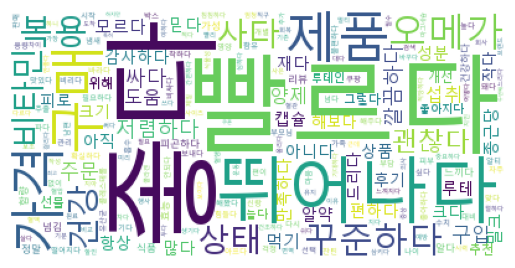

In [42]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

###### 문장을 합쳐서 계산할때 

In [43]:
# 단어로 쪼개기 
text_split = combined_text.split()

In [44]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'빨르다': 49717,
         '감마': 171,
         '리놀렌산': 155,
         '여성': 383,
         '좋다': 59096,
         '다해': 392,
         '초록색': 40,
         '엄청': 1113,
         '비교': 959,
         '해보다': 3365,
         '브리': 164,
         '결정': 312,
         '함량': 2326,
         '높다': 2155,
         '과정': 188,
         '마음': 1770,
         '믿다': 4810,
         '구매': 21635,
         '알약': 3680,
         '개봉시': 12,
         '터지다': 176,
         '주의': 272,
         '껍질': 47,
         '제거': 166,
         '습관': 418,
         '누르다': 540,
         '얼른': 140,
         '양제': 6754,
         '실선': 1,
         '가위': 17,
         '상태': 10439,
         '깔끔하다': 8611,
         '두번째': 848,
         '구입': 7541,
         '월경': 52,
         '증후군': 244,
         '모르다': 5538,
         '영향': 248,
         '다시': 2181,
         '주문': 7515,
         '크기': 3856,
         '크다': 4631,
         '편입': 240,
         '판매': 1412,
         '답글': 226,
         '안녕하다': 458,
         '고객': 312,
         '제품': 20482,
      

In [45]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(combined_text)

In [46]:
# count 
wordCloud.words_ 

{'빨르다 뛰어나다': 1.0,
 '뛰어나다 빨르다': 0.26657517535834097,
 '상태 깔끔하다': 0.24290942360475754,
 '좋다 빨르다': 0.21213784690454407,
 '깔끔하다 좋다': 0.18789265019823118,
 '싸다 사다': 0.17624275693809088,
 '가격 싸다': 0.16413540713632205,
 '사다 빨르다': 0.16068923452272035,
 '좋다 좋다': 0.14769746874046966,
 '가격 괜찮다': 0.14467825556572125,
 '좋다 상태': 0.09777371149740775,
 '양제': 0.09240622140896615,
 '좋다 가격': 0.08676425739554743,
 '빨르다 가격': 0.08655077767612077,
 '그렇다': 0.0750838670326319,
 '아니다': 0.0738334858188472,
 '뛰어나다 좋다': 0.0737419945105215,
 '꾸준하다 복용': 0.06364745349191826,
 '좋다 제품': 0.06279353461421165,
 '구매 빨르다': 0.062427569380908814,
 '가격 저렴하다': 0.05995730405611467,
 '괜찮다 빨르다': 0.05785300396462336,
 '복용': 0.056877096675815794,
 '빨르다 좋다': 0.05498627630375114,
 '좋다 구매': 0.05455931686489784,
 '빨르다 빨르다': 0.05391887770661787,
 '많다': 0.053552912473315034,
 '알다': 0.052455016773406526,
 '괜찮다 가격': 0.052119548642878925,
 '먹기 편하다': 0.049771271729185725,
 '제품': 0.04684354986276304,
 '빨르다 맛있다': 0.046447087526684964,
 '저렴하다 구매

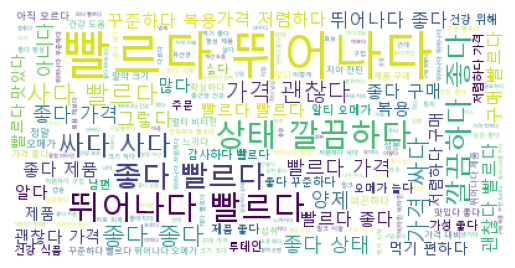

In [47]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

In [49]:
### 단어 치환하는 코드
def second_replace(tokens, replace_dict):
    return [replace_dict.get(word, word) for word in tokens]

In [50]:
# 대체어
df_replace = pd.read_excel('../datasets/dic/replace_list.xlsx')
df_replace[-2:]

,before_replacement,after_replacement
493,추천합니다,좋다
494,빨르다,빠르다


In [51]:
replace_dict = df_replace.set_index('before_replacement').to_dict()['after_replacement']

In [52]:
# 2차 단어 치환 적용
df_all['tokenized_reviews'] = df_all['replaced_review'].apply(second_replace, replace_dict=replace_dict)

In [53]:
# 결과 확인: 처음 5개 레코드의 2차 단어 치환 결과 출력
for i, tokens in enumerate(df_all['tokenized_reviews'][:5]):
    original_review = df_all['review_content'][i]
    replaced_review = ' '.join(tokens)
    print(f"Original Review ({i + 1}): {original_review}")
    print(f"Replaced Review ({i + 1}): {replaced_review}")
    print()

Original Review (1): 배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요
감마리놀렌산이 여성에게 좋다해서 초록색창에서 엄청 비교해보다가 브리오로 결정했어요!
함량도 높고 제조과정이 마음에 들었어요
믿고 구매했는데 효과가 있으면 좋겠네요

알약 개봉시 터짐 주의에 따라 껍질부터 제거하고 먹는거 중☆☆요 습관처럼 눌러서 뜯다가 하나가 살짝 터져서 얼른 입으로 슝

다른 영양제 처럼 하나씩 뜯기게끔 실선이 있으면 좋겠어요
어디 들고 나갈 때 가위로 오려서 가요...ㅎㅎㅎ
더보기
상세보기
상세보기
Replaced Review (1): 빨 르 다   감 마   리 놀 렌 산   요 성   좋 다   다 해   초 록 색   엄 청   비 교   해 보 다   브 리   결 정   함 량   높 다   과 정   마 음   믿 다   구 매   좋 다   알 약   개 봉 시   터 지 다   주 의   껍 질   제 거   습 관   누 르 다   터 지 다   얼 른   양 제   실 선   좋 다   가 위

Original Review (2): 유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요
두번째 구입입니다 .월경 증후군에 효과가 있다고 해서  구입했습니다. 효과가 100프로 있는지는 잘 모르겠지만  어느정도 영향을 받는듯 합니다.
그래서 다시한번 주문 했습니다.
알약 크기는 큰편입니다. 
상세보기
상세보기
상세보기
판매자 답글
판매자
2023.07.17
안녕하세요 고객님^^
브리오 제품을 구매해주셔서 대단히 감사합니다. ^^ 
브리오 제품 드시고 고객님 건강에 많은 도움이 되셨으면 좋겠습니다. 
문의사항 있으시면 언제든지 연락주세요. ^^감사합니다. ^^ -(주)브리오 올림-
더보기
Replaced Review (2): 상 태   깔 끔 하 다   좋 다   두 번 째   구 입   월 경   증 후 군   구 입   모 르 다   요 향   다 시   주 문   알 약   크 기   크 다   편 입   판 매   답 글